In [60]:
import csv
import pandas as pd
import os
import codecs
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [52]:
df= pd.read_csv(r'test.csv')
synopses=" ".join(list(df.get("ملخص")))

In [53]:
df2= pd.read_excel(r'E:\DataAnalysis Internship\names.xlsx')
names=list(df2.get('Name'))

In [54]:
import string 
import re

from nltk import word_tokenize
arabic_diacritics = re.compile("""
                             ّ    | # Shadda
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
def preprocess(data):
    temp=[]
    for text in  data:
        # remove Tashkeel
        text = re.sub(arabic_diacritics, '', text)
        #remove longation
        text = re.sub("[إأآا]", "ا", text)
        text = re.sub("ى", "ي", text)
        text = re.sub("ؤ", "ء", text)
        text = re.sub("ئ", "ء", text)
        text = re.sub("ة", "ه", text)
        text = re.sub("گ", "ك", text)
        temp.append(text)

    return temp


In [55]:
names=preprocess(names)

In [56]:
def extract_names(syn):
    temp=[]
    for i in names:
        if i in synopses:
            temp.append(i)
    temp="،".join(temp)
    return temp

In [57]:
reshaped_text = get_display(arabic_reshaper.reshape(extract_names(synopses)))

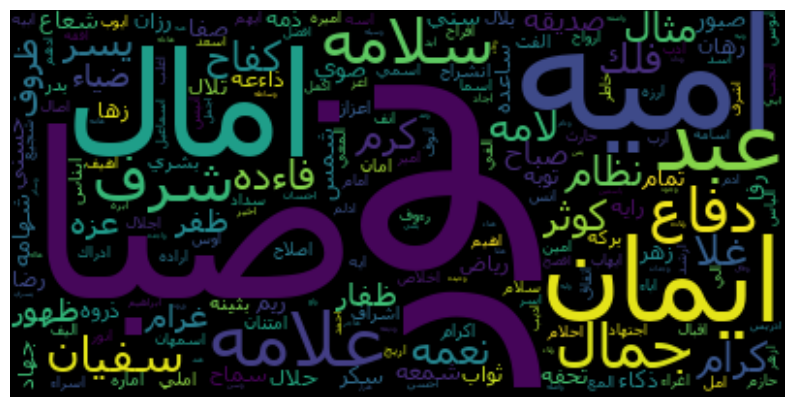

In [69]:
# Generate a word cloud image
wordcloud = WordCloud(font_path="tahoma.ttf").generate(reshaped_text)
# Display the generated image:
# the matplotlib way:
figure(figsize=(10, 10), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There is some problems with arabic names make some words seem like names:
    'صديقة' which can be a name of girl or some word meaning a friend,
    'صديق' which can be a name of boy or some word meaning a friend,
    'حياة' which can be a name of girl or a word meaning the life
    and so on...